In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('train_data_week_1_challenge.csv')

In [3]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [4]:
data.isnull().sum()

continue_drop           0
student_id              0
gender                  0
caste                   0
mathematics_marks       0
english_marks           0
science_marks           0
science_teacher         0
languages_teacher       0
guardian                0
internet                0
school_id               0
total_students          0
total_toilets         312
establishment_year    312
dtype: int64

In [5]:
data['total_toilets'].fillna(data['total_toilets'].mean(), inplace=True)

In [6]:
data.isnull().sum()

continue_drop           0
student_id              0
gender                  0
caste                   0
mathematics_marks       0
english_marks           0
science_marks           0
science_teacher         0
languages_teacher       0
guardian                0
internet                0
school_id               0
total_students          0
total_toilets           0
establishment_year    312
dtype: int64

In [7]:
data['establishment_year'].fillna(data['establishment_year'].mean(), inplace=True)

In [8]:
data.isnull().sum()

continue_drop         0
student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [9]:
data['continue_drop'][data['continue_drop'] == 'continue'] = 1
data['continue_drop'][data['continue_drop'] == 'drop'] = 0

/Volumes/Other/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/Other/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,1,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,1,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,1,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,1,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [11]:
data = pd.get_dummies(data,columns=['gender','caste','guardian','internet'])

In [12]:
data.head()

,continue_drop,student_id,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,1,s01746,0.666,0.468,0.666,7,6,305,354,86.0,...,1,0,0,0,0,0,0,1,0,1
1,1,s16986,0.172,0.420,0.172,8,10,331,516,15.0,...,1,0,0,0,0,0,1,0,1,0
2,1,s00147,0.212,0.601,0.212,1,4,311,209,14.0,...,1,0,0,0,0,0,1,0,1,0
3,1,s08104,0.434,0.611,0.434,2,5,364,147,28.0,...,0,0,0,1,1,0,0,0,0,1
4,1,s11132,0.283,0.478,0.283,1,10,394,122,15.0,...,0,0,1,0,0,0,1,0,0,1


In [13]:
X = data.iloc[:,2:].values
y = data.iloc[:,0].values

In [14]:
y = np.asarray(y,dtype=np.float64)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)


In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
 score = knn.score(X_test,y_test)

In [19]:
print(score)

0.9473531122745782


In [20]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9651687027341478
0.9473531122745782


In [21]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)
print(knn1.score(X_train,y_train))
print(knn1.score(X_test,y_test))

0.9554246655031995
0.9473531122745782


In [22]:
train_accuracy = []
test_accuracy = []
n_neighbors = range(1,11)
for neighbors in n_neighbors:
    knn2 = KNeighborsClassifier(n_neighbors=neighbors)
    knn2.fit(X_train,y_train)
    train_accuracy.append(knn2.score(X_train,y_train))
    test_accuracy.append(knn2.score(X_test,y_test))

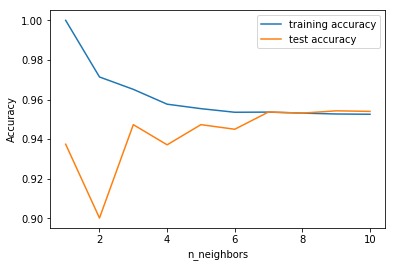

In [23]:
plt.plot(n_neighbors, train_accuracy, label="training accuracy")
plt.plot(n_neighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X  = StandardScaler()
x_new_train = sc_X.fit_transform(X_train)
X_new_test = sc_X.transform(X_test)


knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(x_new_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [25]:
print("Training score after scaling features: {:.2f}".format(knn3.score(x_new_train,y_train)))
print("Test score after scaling {:.2f}".format(knn3.score(X_new_test,y_test)))

Training score after scaling features: 0.99
Test score after scaling 0.99


Splitting data into train validation and test set

In [27]:
x_train,x_val,Y_train,y_val = train_test_split(x_new_train,y_train,test_size=.2, random_state=35)

In [28]:
knnval = KNeighborsClassifier(n_neighbors=7)
knnval.fit(x_train,Y_train)
print(knnval.score(x_val,y_val))

0.985459832788077


In [29]:
print(knnval.score(X_new_test,y_test))

0.9848749272833043


# Feature Engineering

adding a new feature called average_marks = (mathematics_marks + science_marks + english_marks)/3

In [27]:
data.head()

,continue_drop,student_id,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,1,s01746,0.666,0.468,0.666,7,6,305,354,86.0,...,1,0,0,0,0,0,0,1,0,1
1,1,s16986,0.172,0.420,0.172,8,10,331,516,15.0,...,1,0,0,0,0,0,1,0,1,0
2,1,s00147,0.212,0.601,0.212,1,4,311,209,14.0,...,1,0,0,0,0,0,1,0,1,0
3,1,s08104,0.434,0.611,0.434,2,5,364,147,28.0,...,0,0,0,1,1,0,0,0,0,1
4,1,s11132,0.283,0.478,0.283,1,10,394,122,15.0,...,0,0,1,0,0,0,1,0,0,1


In [30]:
data['average_marks'] = (data['mathematics_marks'] + data['english_marks'] + data['science_marks'])/3

In [ ]:
data.to_csv('train_set.csv')

In [31]:
X1 = data.iloc[:,2:].values
y1 = data.iloc[:,0].values
y1 = np.asarray(y,dtype=np.float64)

In [32]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=.2,random_state=1)

train_accuracy1 = []
test_accuracy1 = []
n_neighbors1 = range(1,11)
for neighbors in n_neighbors1:
    knn5 = KNeighborsClassifier(n_neighbors=neighbors)
    knn5.fit(X1_train,y1_train)
    train_accuracy1.append(knn5.score(X1_train,y1_train))
    test_accuracy1.append(knn5.score(X1_test,y1_test))

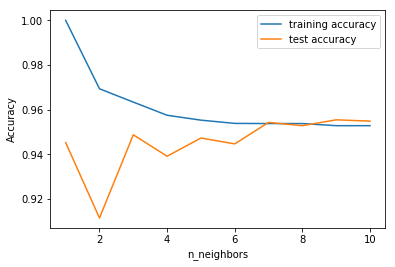

In [33]:
plt.plot(n_neighbors1, train_accuracy1, label="training accuracy")
plt.plot(n_neighbors1, test_accuracy1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [34]:
sc_X1  = StandardScaler()
x1_new_train = sc_X1.fit_transform(X1_train)
X1_new_test = sc_X1.transform(X1_test)

knn6 = KNeighborsClassifier(n_neighbors=7)
knn6.fit(x1_new_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [35]:
pred = knn6.predict(X1_new_test)

In [36]:
print("Training score after scaling features: {:.2f}".format(knn6.score(x1_new_train,y1_train)))
print("Test score after scaling {:.2f}".format(knn6.score(X1_new_test,y1_test)))

Training score after scaling features: 0.99
Test score after scaling 0.99


In [37]:
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y1_test, pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 131   21]
 [   2 3284]]


In [55]:
test = pd.read_csv('test_data_week_1_challenge.csv')

In [56]:
test.isnull().sum()

student_id             0
gender                 0
caste                  0
mathematics_marks      0
english_marks          0
science_marks          0
science_teacher        0
languages_teacher      0
guardian               0
internet               0
school_id              0
total_students         0
total_toilets         26
establishment_year    26
dtype: int64

In [57]:
test['total_toilets'].fillna(test['total_toilets'].mean(), inplace=True)
test['establishment_year'].fillna(test['establishment_year'].mean(), inplace=True)

In [58]:
test.isnull().sum()

student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [59]:
test = pd.get_dummies(test,columns=['gender','caste','guardian','internet'])

In [61]:
test['average_marks'] = (test['mathematics_marks'] + test['english_marks'] + test['science_marks'])/3

In [79]:
test.to_csv('preprossed.csv')

In [67]:
Xtest = test.iloc[:,1:].values

In [75]:
len(Xtest)

1910

In [69]:
sc  = StandardScaler()
xtest = sc.fit_transform(Xtest)

In [71]:
predicted = knn6.predict(xtest)

In [73]:
np.save('predictions.npy',predicted)

In [34]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
print(clf.score(X_test,y_test))

1.0


In [37]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
1.0


In [42]:
X12.columns

Index(['mathematics_marks', 'english_marks', 'science_marks',
       'science_teacher', 'languages_teacher', 'school_id', 'total_students',
       'total_toilets', 'establishment_year', 'gender_F', 'gender_M',
       'caste_BC', 'caste_OC', 'caste_SC', 'caste_ST', 'guardian_father',
       'guardian_mixed', 'guardian_mother', 'guardian_other', 'internet_False',
       'internet_True'],
      dtype='object')

In [43]:
#examing the important features
feature_importances = pd.DataFrame(clf2.feature_importances_,
                                   index = X12.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [44]:
feature_importances

,importance
english_marks,0.213017
science_marks,0.173443
mathematics_marks,0.164713
languages_teacher,0.140225
science_teacher,0.099582
guardian_mother,0.026670
gender_M,0.026338
guardian_father,0.021671
gender_F,0.018621
guardian_other,0.018396


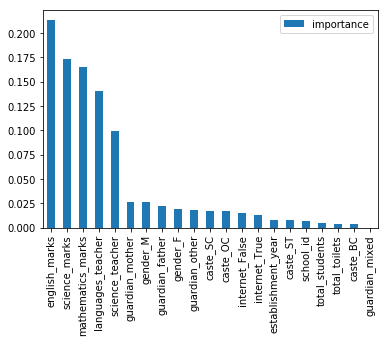

In [45]:
#ploting the feature importances inorder of importance
feature_importances.plot(kind='bar')

In [46]:
#using the important features only for the model
X_new = data[['english_marks','science_marks','mathematics_marks','languages_teacher','average_marks']].values

In [47]:
X_new_train,x_new_test,yrf_train,yrf_test = train_test_split(X_new,y,random_state=66)

In [48]:
clf4 = RandomForestClassifier(n_estimators=10)
clf4.fit(X_new_train, yrf_train)
print(clf4.score(X_new_train,yrf_train))
print(clf4.score(x_new_test,yrf_test))

1.0
1.0


# Cross-validation

In [49]:
clean_data = pd.read_csv('Preprocessed_train_set.csv')

In [50]:
X_clean = clean_data.iloc[:,3:].values
y_clean = clean_data.iloc[:,1].values

In [51]:
y_clean

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits = 10)
knn7 = KNeighborsClassifier(n_neighbors=7)
print("Cross validation score:\n{}".format((cross_val_score(knn7,X_clean, y_clean, cv=kfold)).mean()))

Cross validation score:
0.9520069808027924


In [54]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
knn8 = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn8,X_clean, y_clean, cv=loo)
print("mean accuracy:\n{:.2f}".format(scores.mean()))

KeyboardInterrupt: 

In [76]:
sc_X11  = StandardScaler()
X_clean = sc_X11.fit_transform(X_clean)
knn9 = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn9,X_clean, y_clean, cv=kfold)
print("mean accuracy:\n{:.2f}".format(scores.mean()))

mean accuracy:
0.99
